<a href="https://colab.research.google.com/github/caropeboka/pokemon-classifier/blob/main/MSIB_Algoritma_Data_Mining.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Muhammad Kevin Mahendra Caropeboka

MSIB Bisa AI

AI-Hacker

In [ ]:
#mount drive
from google.colab import drive
drive.mount ('/content/drive')

Mounted at /content/drive


In [ ]:
import math
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
train = pd.read_csv('drive/MyDrive/Dataset/pokemon-datasets-for-ml/train_pokemon.csv')
test = pd.read_csv('drive/MyDrive/Dataset/pokemon-datasets-for-ml/test_pokemon.csv')

In [ ]:
train.head(3)

,Number,Name,Type_1,Type_2,Total,HP,Attack,Defense,Sp_Atk,Sp_Def,...,hasGender,Pr_Male,Egg_Group_1,Egg_Group_2,hasMegaEvolution,Height_m,Weight_kg,Catch_Rate,Body_Style,shuffle
0,696,Tyrunt,Rock,Dragon,362,58,89,77,45,45,...,True,0.875,Monster,Dragon,False,0.79,26.0,45,bipedal_tailed,0.806833
1,271,Lombre,Water,Grass,340,60,50,50,60,70,...,True,0.500,Water_1,Grass,False,1.19,32.5,120,bipedal_tailless,0.846142
2,335,Zangoose,Normal,NaN,458,73,115,60,60,60,...,True,0.500,Field,NaN,False,1.30,40.3,90,bipedal_tailed,0.414744


In [ ]:
train.shape

(577, 24)

In [ ]:
train.describe()

,Number,Total,HP,Attack,Defense,Sp_Atk,Sp_Def,Speed,Generation,Pr_Male,Height_m,Weight_kg,Catch_Rate,shuffle
count,577.000000,577.000000,577.000000,577.000000,577.000000,577.000000,577.000000,577.000000,577.000000,512.000000,577.000000,577.000000,577.000000,577.000000
mean,365.173310,421.844021,68.736568,75.944541,71.135182,69.908146,69.885615,66.233969,3.350087,0.553711,1.186118,60.791508,99.535529,0.492639
std,207.850969,109.397402,25.911574,28.915893,29.712554,28.978504,27.363692,27.183131,1.668375,0.199488,1.124625,95.910128,76.706891,0.282454
min,3.000000,195.000000,1.000000,5.000000,5.000000,10.000000,20.000000,5.000000,1.000000,0.000000,0.100000,0.100000,3.000000,0.000197
25%,183.000000,325.000000,50.000000,55.000000,50.000000,47.000000,50.000000,45.000000,2.000000,0.500000,0.610000,9.900000,45.000000,0.248779
50%,366.000000,430.000000,65.000000,75.000000,67.000000,65.000000,65.000000,65.000000,3.000000,0.500000,0.990000,29.500000,60.000000,0.487075
75%,544.000000,500.000000,80.000000,95.000000,85.000000,90.000000,85.000000,85.000000,5.000000,0.500000,1.500000,64.800000,180.000000,0.739929
max,721.000000,720.000000,255.000000,160.000000,230.000000,154.000000,230.000000,160.000000,6.000000,1.000000,14.500000,950.000000,255.000000,0.997422


In [ ]:
# describe(include = ['O']) will show the descriptive statistics of object data types.
train.describe(include=['O'])

,Name,Type_1,Type_2,Color,Egg_Group_1,Egg_Group_2,Body_Style
count,577,577,286,577,577,153,577
unique,577,18,18,10,14,13,14
top,Tyrunt,Water,Flying,Blue,Field,Dragon,bipedal_tailed
freq,1,83,71,112,131,32,124


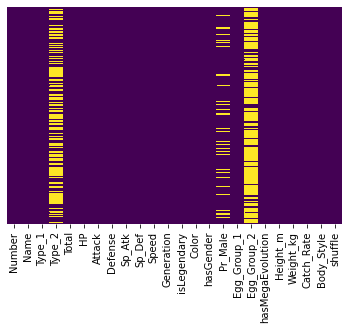

In [ ]:
# check for missing values
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [ ]:
def fill_type_2(cols):
    type_2 = cols[0]
    if pd.isnull(type_2):
        return "None"
    else:
        return type_2

In [ ]:
train['Type_2'] = train[['Type_2']].apply(fill_type_2,axis=1)

In [ ]:
train.drop(columns=['Egg_Group_2'], inplace=True)

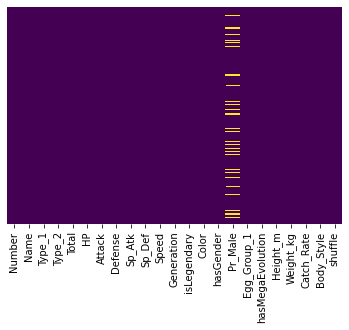

In [ ]:
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [ ]:
legendary = train[train['isLegendary'] == 1]
not_legendary = train[train['isLegendary'] == 0]

print("Legendary: %i (%.1f%%)"%(len(legendary), float(len(legendary))/len(train)*100.0))
print("Not Legendary: %i (%.1f%%)"%(len(not_legendary), float(len(not_legendary))/len(train)*100.0))
print("Total: %i"%len(train))

Legendary: 41 (7.1%)
Not Legendary: 536 (92.9%)
Total: 577


In [ ]:
train.columns

Index(['Number', 'Name', 'Type_1', 'Type_2', 'Total', 'HP', 'Attack',
       'Defense', 'Sp_Atk', 'Sp_Def', 'Speed', 'Generation', 'isLegendary',
       'Color', 'hasGender', 'Pr_Male', 'Egg_Group_1', 'hasMegaEvolution',
       'Height_m', 'Weight_kg', 'Catch_Rate', 'Body_Style', 'shuffle'],
      dtype='object')

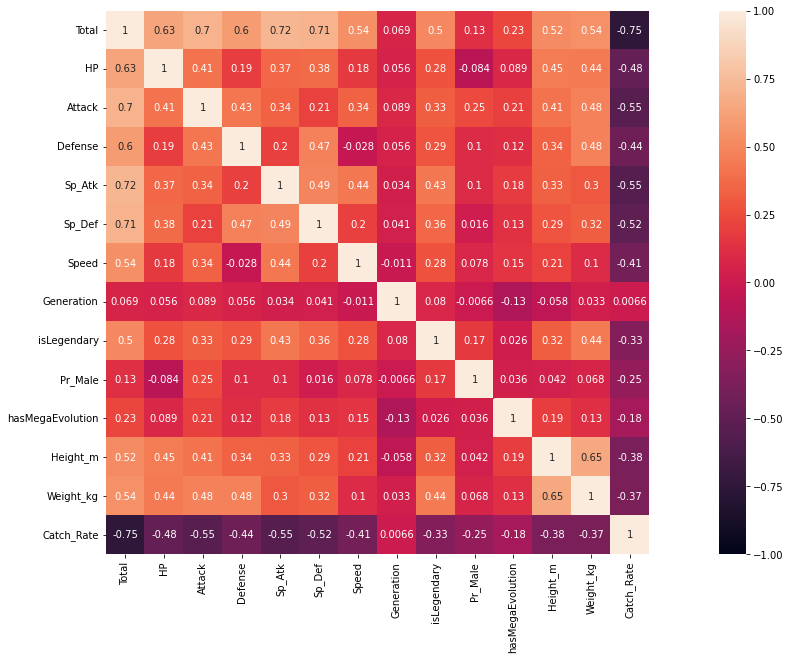

In [ ]:
plt.figure(figsize=(25,10))
train2 = train.drop(['Number','Name','hasGender','shuffle'], axis=1)
sns.heatmap(train2.corr(), vmin= -1, vmax=1, square=True, annot=True)

Text(0.5, 1.0, 'Type_2 Distribution on Legendary')

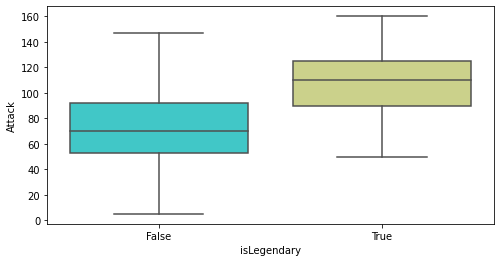

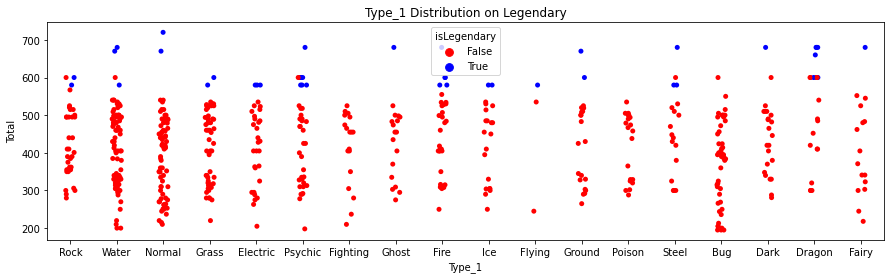

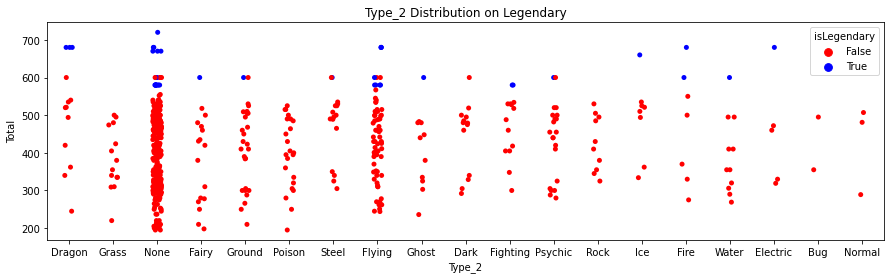

In [ ]:
#boxplot of Attack vs. Legendary
plt.figure(figsize=(8, 4))
sns.boxplot(x='isLegendary',y='Attack',data=train, palette='rainbow')

#stripplot of Attack vs. Legendary
plt.figure(figsize=(15, 4))
sns.stripplot(x='Type_1',y='Total',data=train, jitter=True,hue='isLegendary',palette=['r','b'],dodge=False).set_title('Type_1 Distribution on Legendary')

#stripplot of Attack vs. Legendary
plt.figure(figsize=(15, 4))
sns.stripplot(x='Type_2',y='Total',data=train, jitter=True,hue='isLegendary',palette=['r','b'],dodge=False).set_title('Type_2 Distribution on Legendary')

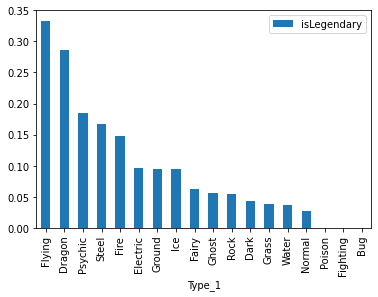

In [ ]:
type_1 = train[['Type_1','isLegendary']].groupby(['Type_1'], as_index=False).mean().set_index('Type_1')
type_1.sort_values(by='isLegendary',ascending=False).plot(kind='bar')

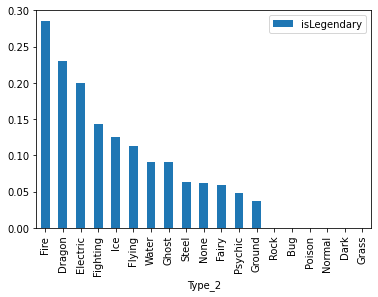

In [ ]:
type_2 = train[['Type_2','isLegendary']].groupby(['Type_2'], as_index=False).mean().set_index('Type_2')
type_2.sort_values(by='isLegendary',ascending=False).plot(kind='bar')

In [ ]:
train_test_data = [train, test]

In [ ]:
for dataset in train_test_data:
    dataset['isLegendary'] = dataset['isLegendary'].map({True: 1, False: 0}).astype(int)

In [ ]:
type_1.sort_values(by='isLegendary',ascending=False)

,isLegendary
Type_1,
Flying,0.333333
Dragon,0.285714
Psychic,0.184211
Steel,0.166667
Fire,0.147059
Electric,0.096774
Ground,0.095238
Ice,0.095238
Fairy,0.062500


In [ ]:
type_1_mapping = {"Fire": 1, "Dragon": 2, "Electric": 3, "Fighting": 4, "Ice": 5, "Flying": 6, "Water": 7, "Ghost": 8, "Steel": 9, "None": 10, "Fairy": 11, "Psychic": 12, "Ground": 13, "Rock": 14, "Bug": 15, "Poison": 16, "Normal": 17, "Dark": 18, "Grass": 19}
for dataset in train_test_data:
    dataset['Type_1'] = dataset['Type_1'].map(type_1_mapping)
    dataset['Type_1'] = dataset['Type_1'].fillna(0)

In [ ]:
type_2_mapping = {"Fire": 1, "Dragon": 2, "Electric": 3, "Fighting": 4, "Ice": 5, "Flying": 6, "Water": 7, "Ghost": 8, "Steel": 9, "None": 10, "Fairy": 11, "Psychic": 12, "Ground": 13, "Rock": 14, "Bug": 15, "Poison": 16, "Normal": 17, "Dark": 18, "Grass": 19}
for dataset in train_test_data:
    dataset['Type_2'] = dataset['Type_2'].map(type_2_mapping)
    dataset['Type_2'] = dataset['Type_2'].fillna(0)

In [ ]:
for dataset in train_test_data:
    pr_male_avg = dataset['Pr_Male'].mean()
    pr_male_std = dataset['Pr_Male'].std()
    pr_male_null_count = dataset['Pr_Male'].isnull().sum()
    
    pr_male_null_random_list = np.random.uniform(pr_male_avg - pr_male_std, pr_male_avg + pr_male_std, pr_male_null_count)
    dataset['Pr_Male'][np.isnan(dataset['Pr_Male'])] = pr_male_null_random_list
    dataset['Pr_Male'] = dataset['Pr_Male'].astype(int)
    
train['Pr_Male_Band'] = pd.cut(train['Pr_Male'], 5)

print(train[['Pr_Male_Band', 'isLegendary']].groupby(['Pr_Male_Band'], as_index=False).mean())

    Pr_Male_Band  isLegendary
0  (-0.001, 0.2]     0.065954
1     (0.2, 0.4]          NaN
2     (0.4, 0.6]          NaN
3     (0.6, 0.8]          NaN
4     (0.8, 1.0]     0.250000


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


In [ ]:
for dataset in train_test_data:
    dataset.loc[ dataset['Pr_Male'] <= 0.2, 'Pr_Male'] = 0
    dataset.loc[(dataset['Pr_Male'] > 0.2) & (dataset['Pr_Male'] <= 0.4), 'Pr_Male'] = 1
    dataset.loc[(dataset['Pr_Male'] > 0.4) & (dataset['Pr_Male'] <= 0.6), 'Pr_Male'] = 2
    dataset.loc[(dataset['Pr_Male'] > 0.6) & (dataset['Pr_Male'] <= 0.8), 'Pr_Male'] = 3
    dataset.loc[ dataset['Pr_Male'] >= 1, 'Pr_Male'] = 4

In [ ]:
for dataset in train_test_data:
    attack_avg = dataset['Attack'].mean()
    attack_std = dataset['Attack'].std()
    attack_null_count = dataset['Attack'].isnull().sum()
    
    attack_null_random_list = np.random.randint(attack_avg - attack_std, attack_avg + attack_std, attack_null_count)
    dataset['Attack'][np.isnan(dataset['Attack'])] = attack_null_random_list
    dataset['Attack'] = dataset['Attack'].astype(int)
    
train['Attack_Band'] = pd.cut(train['Attack'], 5)

print(train[['Attack_Band', 'isLegendary']].groupby(['Attack_Band'], as_index=False).mean())

      Attack_Band  isLegendary
0   (4.845, 36.0]     0.000000
1    (36.0, 67.0]     0.005000
2    (67.0, 98.0]     0.050505
3   (98.0, 129.0]     0.196262
4  (129.0, 160.0]     0.321429


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


In [ ]:
for dataset in train_test_data:
    dataset.loc[ dataset['Attack'] <= 36, 'Attack'] = 0
    dataset.loc[(dataset['Attack'] > 36) & (dataset['Attack'] <= 67), 'Attack'] = 1
    dataset.loc[(dataset['Attack'] > 67) & (dataset['Attack'] <= 98), 'Attack'] = 2
    dataset.loc[(dataset['Attack'] > 98) & (dataset['Attack'] <= 129), 'Attack'] = 3
    dataset.loc[ dataset['Attack'] >= 129, 'Attack'] = 4

In [ ]:
for dataset in train_test_data:
    defense_avg = dataset['Defense'].mean()
    defense_std = dataset['Defense'].std()
    defense_null_count = dataset['Defense'].isnull().sum()
    
    defense_null_random_list = np.random.randint(defense_avg - defense_std, defense_avg + defense_std, defense_null_count)
    dataset['Defense'][np.isnan(dataset['Defense'])] = defense_null_random_list
    dataset['Defense'] = dataset['Defense'].astype(int)
    
train['Defense_Band'] = pd.cut(train['Defense'], 5)

print(train[['Defense_Band', 'isLegendary']].groupby(['Defense_Band'], as_index=False).mean())

     Defense_Band  isLegendary
0   (4.775, 50.0]     0.006061
1    (50.0, 95.0]     0.056604
2   (95.0, 140.0]     0.234568
3  (140.0, 185.0]     0.200000
4  (185.0, 230.0]     0.333333


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


In [ ]:
for dataset in train_test_data:
    dataset.loc[ dataset['Defense'] <= 50, 'Defense'] = 0
    dataset.loc[(dataset['Defense'] > 50) & (dataset['Defense'] <= 95), 'Defense'] = 1
    dataset.loc[(dataset['Defense'] > 95) & (dataset['Defense'] <= 140), 'Defense'] = 2
    dataset.loc[(dataset['Defense'] > 140) & (dataset['Defense'] <= 230), 'Defense'] = 3
    dataset.loc[ dataset['Defense'] >= 230, 'Defense'] = 4

In [ ]:
for dataset in train_test_data:
    cr_avg = dataset['Catch_Rate'].mean()
    cr_std = dataset['Catch_Rate'].std()
    cr_null_count = dataset['Catch_Rate'].isnull().sum()
    
    cr_null_random_list = np.random.randint(cr_avg - cr_std, cr_avg + cr_std, cr_null_count)
    dataset['Catch_Rate'][np.isnan(dataset['Catch_Rate'])] = cr_null_random_list
    dataset['Catch_Rate'] = dataset['Catch_Rate'].astype(int)
    
train['Catch_Rate_Band'] = pd.cut(train['Catch_Rate'], 5)

print(train[['Catch_Rate_Band', 'isLegendary']].groupby(['Catch_Rate_Band'], as_index=False).mean())

  Catch_Rate_Band  isLegendary
0   (2.748, 53.4]     0.163347
1   (53.4, 103.8]     0.000000
2  (103.8, 154.2]     0.000000
3  (154.2, 204.6]     0.000000
4  (204.6, 255.0]     0.000000


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


In [ ]:
for dataset in train_test_data:
    dataset.loc[ dataset['Catch_Rate'] <= 53, 'Catch_Rate'] = 0
    dataset.loc[(dataset['Catch_Rate'] > 53) & (dataset['Catch_Rate'] <= 104), 'Catch_Rate'] = 1
    dataset.loc[(dataset['Catch_Rate'] > 104) & (dataset['Catch_Rate'] <= 154), 'Catch_Rate'] = 2
    dataset.loc[(dataset['Catch_Rate'] > 154) & (dataset['Catch_Rate'] <= 204), 'Catch_Rate'] = 3
    dataset.loc[ dataset['Catch_Rate'] >= 255, 'Catch_Rate'] = 4

In [ ]:
train.columns

Index(['Number', 'Name', 'Type_1', 'Type_2', 'Total', 'HP', 'Attack',
       'Defense', 'Sp_Atk', 'Sp_Def', 'Speed', 'Generation', 'isLegendary',
       'Color', 'hasGender', 'Pr_Male', 'Egg_Group_1', 'hasMegaEvolution',
       'Height_m', 'Weight_kg', 'Catch_Rate', 'Body_Style', 'shuffle',
       'Pr_Male_Band', 'Attack_Band', 'Defense_Band', 'Catch_Rate_Band'],
      dtype='object')

In [ ]:
train_drop = ['Number', 'Name', 'Total', 'HP', 'Sp_Atk', 'Sp_Def', 'Speed', 'Generation','Color', 'hasGender', 'Egg_Group_1', 'hasMegaEvolution','Height_m', 'Weight_kg', 'Body_Style', 'shuffle','Pr_Male_Band', 'Attack_Band', 'Defense_Band', 'Catch_Rate_Band']
train = train.drop(train_drop, axis=1)

In [ ]:
train.head()

,Type_1,Type_2,Attack,Defense,isLegendary,Pr_Male,Catch_Rate
0,14,2,2,1,0,0,0
1,7,19,1,0,0,0,2
2,17,10,3,1,0,0,1
3,19,11,0,1,0,0,3
4,14,13,1,3,0,0,0


In [ ]:
test.head()

,Number,Name,Type_1,Type_2,Total,HP,Attack,Defense,Sp_Atk,Sp_Def,...,hasGender,Pr_Male,Egg_Group_1,Egg_Group_2,hasMegaEvolution,Height_m,Weight_kg,Catch_Rate,Body_Style,shuffle
0,324,Torkoal,1,0.0,470,70,2,2,85,70,...,True,0,Field,NaN,False,0.51,80.4,1,quadruped,0.731225
1,425,Drifloon,8,6.0,348,90,1,0,60,44,...,True,0,Amorphous,NaN,False,0.41,1.2,2,head_arms,0.024422
2,165,Ledyba,15,6.0,265,40,0,0,40,80,...,True,0,Bug,NaN,False,0.99,10.8,4,two_wings,0.246488
3,78,Rapidash,1,0.0,500,65,3,1,80,80,...,True,0,Field,NaN,False,1.70,95.0,1,quadruped,0.969218
4,491,Darkrai,18,0.0,600,70,2,1,135,90,...,False,0,Undiscovered,NaN,False,1.50,50.5,0,bipedal_tailless,0.924239


In [ ]:
test_drop = ['Number', 'Name', 'Total', 'HP', 'Sp_Atk', 'Sp_Def', 'Speed', 'Generation',
       'Color', 'hasGender', 'Egg_Group_1', 'Egg_Group_2', 'isLegendary',
       'hasMegaEvolution', 'Height_m', 'Weight_kg', 'Body_Style',
       'shuffle']
test = test.drop(test_drop, axis=1)

In [ ]:
test.head()

,Type_1,Type_2,Attack,Defense,Pr_Male,Catch_Rate
0,1,0.0,2,2,0,1
1,8,6.0,1,0,0,2
2,15,6.0,0,0,0,4
3,1,0.0,3,1,0,1
4,18,0.0,2,1,0,0


In [ ]:
X_train = train.drop('isLegendary', axis=1)
y_train = train['isLegendary']
X_test = test.copy()

X_train.shape, y_train.shape, X_test.shape

((577, 6), (577,), (144, 6))

In [ ]:
# Importing Classifier Modules
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier

In [ ]:
clf = LogisticRegression()
clf.fit(X_train, y_train)
y_pred_log_reg = clf.predict(X_test)
acc_log_reg = round( clf.score(X_train, y_train) * 100, 2)
print(str(acc_log_reg) + ' percent')

94.45 percent


In [ ]:
clf = SVC()
clf.fit(X_train, y_train)
y_pred_svc = clf.predict(X_test)
acc_svc = round(clf.score(X_train, y_train) * 100, 2)
print (acc_svc)

92.89


In [ ]:
clf = KNeighborsClassifier(n_neighbors = 3)
clf.fit(X_train, y_train)
y_pred_knn = clf.predict(X_test)
acc_knn = round(clf.score(X_train, y_train) * 100, 2)
print (acc_knn)

95.84


In [ ]:
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)
y_pred_decision_tree = clf.predict(X_test)
acc_decision_tree = round(clf.score(X_train, y_train) * 100, 2)
print (acc_decision_tree)

98.79


In [ ]:
clf = RandomForestClassifier(n_estimators=100)
clf.fit(X_train, y_train)
y_pred_random_forest = clf.predict(X_test)
acc_random_forest = round(clf.score(X_train, y_train) * 100, 2)
print (acc_random_forest)

98.79


In [ ]:
clf = GaussianNB()
clf.fit(X_train, y_train)
y_pred_gnb = clf.predict(X_test)
acc_gnb = round(clf.score(X_train, y_train) * 100, 2)
print (acc_gnb)

64.12


In [ ]:
clf = Perceptron(max_iter=5, tol=None)
clf.fit(X_train, y_train)
y_pred_perceptron = clf.predict(X_test)
acc_perceptron = round(clf.score(X_train, y_train) * 100, 2)
print (acc_perceptron)

93.93


In [ ]:
clf = SGDClassifier(max_iter=5, tol=None)
clf.fit(X_train, y_train)
y_pred_sgd = clf.predict(X_test)
acc_sgd = round(clf.score(X_train, y_train) * 100, 2)
print (acc_sgd)

93.24


Accuracy: 98 % 

Confusion Matrix in Numbers
[[535   1]
 [  6  35]]

Confusion Matrix in Percentage
[[1.   0.  ]
 [0.15 0.85]]



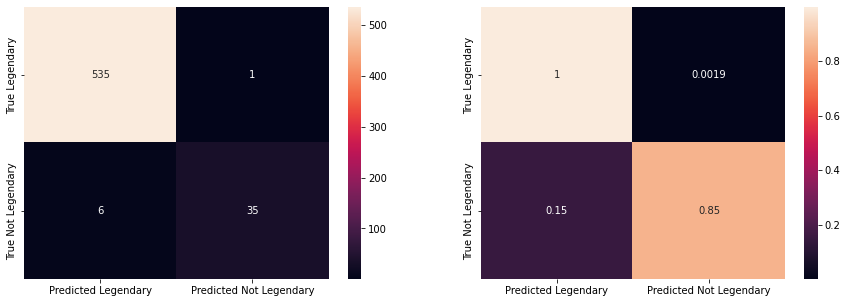

In [ ]:
from sklearn.metrics import confusion_matrix
import itertools

clf = RandomForestClassifier(n_estimators=100)
clf.fit(X_train, y_train)
y_pred_random_forest_training_set = clf.predict(X_train)
acc_random_forest = round(clf.score(X_train, y_train) * 100, 2)
print ("Accuracy: %i %% \n"%acc_random_forest)

class_names = ['Legendary', 'Not Legendary']

# Compute confusion matrix
cnf_matrix = confusion_matrix(y_train, y_pred_random_forest_training_set)
np.set_printoptions(precision=2)

print ('Confusion Matrix in Numbers')
print (cnf_matrix)
print ('')

cnf_matrix_percent = cnf_matrix.astype('float') / cnf_matrix.sum(axis=1)[:, np.newaxis]

print ('Confusion Matrix in Percentage')
print (cnf_matrix_percent)
print ('')

true_class_names = ['True Legendary', 'True Not Legendary']
predicted_class_names = ['Predicted Legendary', 'Predicted Not Legendary']

df_cnf_matrix = pd.DataFrame(cnf_matrix, 
                             index = true_class_names,
                             columns = predicted_class_names)

df_cnf_matrix_percent = pd.DataFrame(cnf_matrix_percent, 
                                     index = true_class_names,
                                     columns = predicted_class_names)

plt.figure(figsize = (15,5))

plt.subplot(121)
sns.heatmap(df_cnf_matrix, annot=True, fmt='d')

plt.subplot(122)
sns.heatmap(df_cnf_matrix_percent, annot=True)

In [ ]:
models = pd.DataFrame({
    'Model': ['Logistic Regression', 'Support Vector Machines', 
              'KNN', 'Decision Tree', 'Random Forest', 'Naive Bayes', 
              'Perceptron', 'Stochastic Gradient Decent'],
    
    'Score': [acc_log_reg, acc_svc, 
              acc_knn,  acc_decision_tree, acc_random_forest, acc_gnb, 
              acc_perceptron, acc_sgd]
    })

models.sort_values(by='Score', ascending=False)

,Model,Score
3,Decision Tree,98.79
4,Random Forest,98.79
2,KNN,95.84
0,Logistic Regression,94.45
6,Perceptron,93.93
7,Stochastic Gradient Decent,93.24
1,Support Vector Machines,92.89
5,Naive Bayes,64.12
